## Homework 3
### Part 1: Imbalanced Dataset

- In this homework, you will be working with an imbalanced Dataset. 
- The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. 
- The aim is to detect fraudlent transactions.

### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Shruti Agarwal
### UNI: sa4136

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Feel free to import any other packages you need
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, average_precision_score

# !pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve


### **Data Preprocessing and Exploration**.
- Download the Kaggle Credit Card Fraud data set.<br>
- Features V1, V2, … V27, V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.<br>
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br>
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **Examining the class Imbalance**
**1.1 How many observations are in this dataset? How many are positive and negative?** <br>
(Note: Positive labels are labeled as 1)

In [4]:
# Your Code Here

num_obs = raw_df.shape[0]
obs = raw_df.groupby(['Class']).size()
pos_obs = obs[1]
neg_obs = obs[0]
print(f"There are {num_obs} observations in the dataset with {pos_obs} positive and {neg_obs} negative observations.")

There are 284807 observations in the dataset with 492 positive and 284315 negative observations.


#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column. 
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [5]:
cleaned_df = raw_df.copy()

# You don't want the 'Time' column. Pop it off
cleaned_df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount') + eps)

**1.2.1 Split the dataset into development and test sets. Set test size as 20% and random state as 42. Print the shape of your development and test features**

In [6]:
# Your Code Here

X = cleaned_df.drop('Class', axis=1) 
y = cleaned_df['Class']

# split the dataset into development and test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of the development and test sets
print("Development set features shape:", X_dev.shape)
print("Test set features shape:", X_test.shape)

Development set features shape: (227845, 29)
Test set features shape: (56962, 29)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [7]:
# Your Code Here

scaler = StandardScaler()
X_dev_scaled = scaler.fit_transform(X_dev)
X_test_scaled = scaler.transform(X_test)

### **Default Baseline**
**1.3.1 First, let us fit a default Decision tree classifier (use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [8]:
# Your Code Here

dt_def = DecisionTreeClassifier(max_depth=10, random_state=42)

auc_scores = cross_val_score(dt_def, X_dev_scaled, y_dev, cv=5, scoring='roc_auc')
ap_scores = cross_val_score(dt_def, X_dev_scaled, y_dev, cv=5, scoring='average_precision')

# print the AUC and Average Precision scores
print("AUC scores:", auc_scores)
print("Average Precision scores:", ap_scores)
print("Average AUC:", auc_scores.mean())
print("Average Average Precision:", ap_scores.mean())

AUC scores: [0.86957634 0.82799822 0.83798122 0.88266235 0.90893353]
Average Precision scores: [0.64646286 0.6763446  0.61677062 0.68317716 0.68281098]
Average AUC: 0.8654303324923142
Average Average Precision: 0.6611132453729376


### **Random Oversampling**
**1.3.2 Perform random oversampling on the development dataset.**

*   How many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)

In [9]:
# Your Code Here

ros = RandomOverSampler(random_state=42)
X_dev_ros, y_dev_ros = ros.fit_resample(X_dev_scaled, y_dev)

print("Number of positive labels:", sum(y_dev_ros == 1))
print("Number of negative labels:", sum(y_dev_ros == 0))
print("Shape of the resampled development set:", X_dev_ros.shape)

Number of positive labels: 227451
Number of negative labels: 227451
Shape of the resampled development set: (454902, 29)


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step (1.3.2 Random oversampling). <br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation) <br>
This will help us to compare the models.**

In [10]:
# Your Code Here

dt_ros = DecisionTreeClassifier(max_depth=10, random_state=42)

auc_scores = cross_val_score(dt_ros, X_dev_ros, y_dev_ros, cv=5, scoring='roc_auc')
ap_scores = cross_val_score(dt_ros, X_dev_ros, y_dev_ros, cv=5, scoring='average_precision')

# print the AUC and Average Precision scores
print("AUC scores:", auc_scores)
print("Average Precision scores:", ap_scores)
print("Average AUC:", auc_scores.mean())
print("Average Average Precision:", ap_scores.mean())

AUC scores: [0.99840012 0.9983086  0.99847279 0.99847804 0.99857557]
Average Precision scores: [0.99786268 0.99767719 0.9978636  0.99787444 0.99807898]
Average AUC: 0.9984470244132799
Average Average Precision: 0.9978713776423949


### **Random Undersampling**
**1.3.4 Perform Random undersampling on the development dataset.**

- How many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing undersampling)

In [11]:
# Your Code Here

rus = RandomUnderSampler(random_state=42)
X_dev_rus, y_dev_rus = rus.fit_resample(X_dev_scaled, y_dev)

In [12]:
print("Number of positive labels:", sum(y_dev_rus == 1))
print("Number of negative labels:", sum(y_dev_rus == 0))

Number of positive labels: 394
Number of negative labels: 394


In [13]:
print("Shape of the resampled development set:", X_dev_rus.shape)

Shape of the resampled development set: (788, 29)


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [14]:
# Your Code Here

dt_rus = DecisionTreeClassifier(max_depth=10, random_state=42)

auc_scores = cross_val_score(dt_rus, X_dev_rus, y_dev_rus, cv=5, scoring='roc_auc')
ap_scores = cross_val_score(dt_rus, X_dev_rus, y_dev_rus, cv=5, scoring='average_precision')

# print the AUC and Average Precision scores
print("AUC scores:", auc_scores)
print("Average Precision scores:", ap_scores)
print("Average AUC:", auc_scores.mean())
print("Average Average Precision:", ap_scores.mean())

AUC scores: [0.8852748  0.86388399 0.89873418 0.91731581 0.94790652]
Average Precision scores: [0.82838644 0.81661392 0.86683544 0.87531025 0.92073059]
Average AUC: 0.9026230592566116
Average Average Precision: 0.8615753308133469


### **SMOTE**
**1.3.6 Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset**

- How many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing SMOTE)

In [15]:
# Your Code Here

smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev_scaled, y_dev)

In [16]:
print("Number of positive labels:", sum(y_dev_smote == 1))
print("Number of negative labels:", sum(y_dev_smote == 0))

Number of positive labels: 227451
Number of negative labels: 227451


In [17]:
print("Shape of the resampled development set:", X_dev_smote.shape)

Shape of the resampled development set: (454902, 29)


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 SMOTE).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [18]:
# Your Code Here

dt_smote = DecisionTreeClassifier(max_depth=10, random_state=42)

auc_scores = cross_val_score(dt_smote, X_dev_smote, y_dev_smote, cv=5, scoring='roc_auc')
ap_scores = cross_val_score(dt_smote, X_dev_smote, y_dev_smote, cv=5, scoring='average_precision')

# print the AUC and Average Precision scores
print("AUC scores:", auc_scores)
print("Average Precision scores:", ap_scores)
print("Average AUC:", auc_scores.mean())
print("Average Average Precision:", ap_scores.mean())

AUC scores: [0.99729603 0.99747394 0.99713467 0.99703584 0.99724342]
Average Precision scores: [0.99658165 0.99656764 0.99603047 0.99593317 0.99618909]
Average AUC: 0.9972367791948902
Average Average Precision: 0.996260402041384


### **Balanced Weight**

**1.3.8 Train a balanced default Decision tree classifier. <br> [ use max_depth=10 and random_state=42 and balance the class weights with 5 Fold Cross Validation ] <br>
Print the AUC and average precision on dev set**

In [19]:
# Your Code Here

dt_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
cv_results = cross_validate(dt_balanced, X_dev_scaled, y_dev, cv=5, scoring=('roc_auc', 'average_precision'))

# print the AUC and average precision on the development set
print("AUC on development set:", cv_results['test_roc_auc'].mean())
print("Average precision on development set:", cv_results['test_average_precision'].mean())

AUC on development set: 0.9070005244195443
Average precision on development set: 0.623661060432623


### **Model Prediction & Evaluation**
**1.4.1 Make predictions on the test set using the five models that you built and report their AUC values.**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [20]:
# Your Code Here

dt_def.fit(X_dev_scaled, y_dev)
dt_ros.fit(X_dev_ros, y_dev_ros)
dt_rus.fit(X_dev_rus, y_dev_rus)
dt_smote.fit(X_dev_smote, y_dev_smote)
dt_balanced.fit(X_dev_scaled, y_dev)

# make predictions on the test set and compute AUC scores
y_pred_def = dt_def.predict_proba(X_test_scaled)[:, 1]
auc_def = roc_auc_score(y_test, y_pred_def)

y_pred_ros = dt_ros.predict_proba(X_test_scaled)[:, 1]
auc_ros = roc_auc_score(y_test, y_pred_ros)

y_pred_rus = dt_rus.predict_proba(X_test_scaled)[:, 1]
auc_rus = roc_auc_score(y_test, y_pred_rus)

y_pred_smote = dt_smote.predict_proba(X_test_scaled)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_smote)

y_pred_balanced = dt_balanced.predict_proba(X_test_scaled)[:, 1]
auc_balanced = roc_auc_score(y_test, y_pred_balanced)

# print the AUC scores
print("AUC for Default Baseline:", auc_def)
print("AUC for Random Oversampling:", auc_ros)
print("AUC for Random Undersampling:", auc_rus)
print("AUC for Smote:", auc_smote)
print("AUC for Balanced Weights:", auc_balanced)

AUC for Default Baseline: 0.871912253224306
AUC for Random Oversampling: 0.8609190528349776
AUC for Random Undersampling: 0.9050787485787788
AUC for Smote: 0.8893473364303515
AUC for Balanced Weights: 0.8432507780827582


**1.4.2 Plot Confusion Matrices for all the five models on the test set. Comment your results and share your observations of the confusion matrices in detail**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


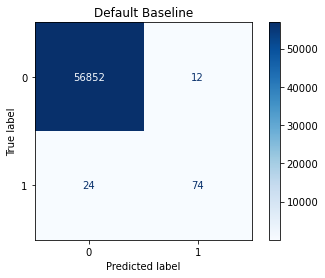

/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


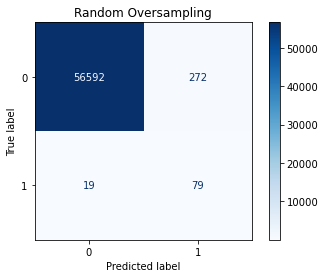

/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


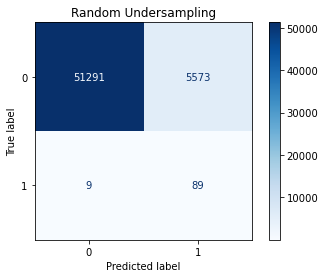

/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


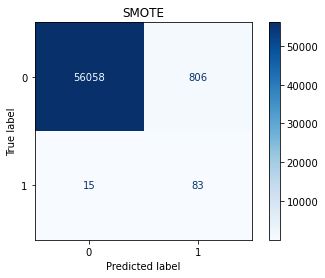

/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


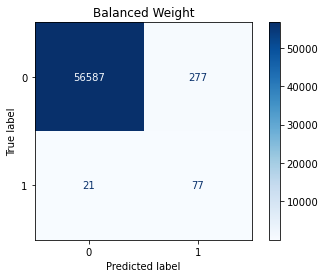

In [21]:
titles = ['Default Baseline', 'Random Oversampling', 'Random Undersampling', 'SMOTE', 'Balanced Weight']
classifiers = [dt_def, dt_ros, dt_rus, dt_smote, dt_balanced]


for clf, title in zip(classifiers, titles):
    # predict the target variable for the test set
    y_pred = clf.predict(X_test_scaled)
    # calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # plot the confusion matrix
    plot_confusion_matrix(clf, X_test_scaled, y_test, cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

**1.4.3 Plot ROC for all the five models on the test set in a single plot. Make sure you label axes and legend properly. Comment on your results and share your observations in detail**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

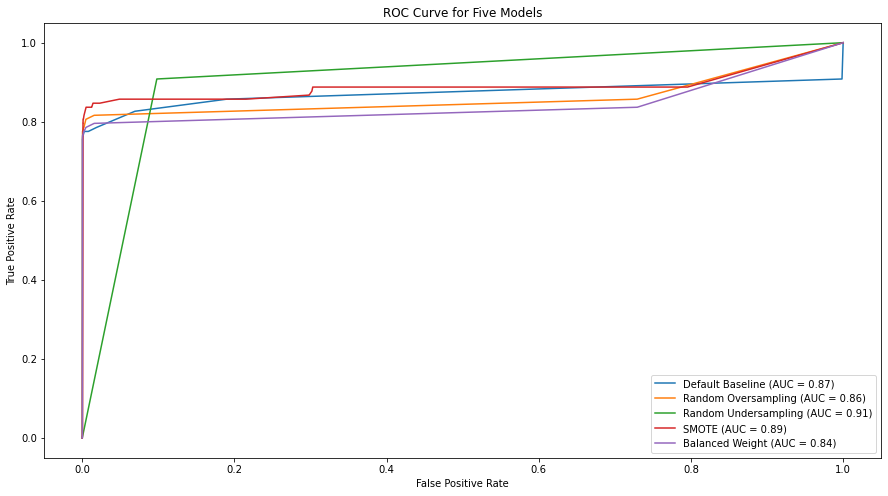

In [22]:
# Your Code Here

titles = ['Default Baseline', 'Random Oversampling', 'Random Undersampling', 'SMOTE', 'Balanced Weight']
classifiers = [dt_def, dt_ros, dt_rus, dt_smote, dt_balanced]

plt.figure(figsize=(15, 8))
for clf, title in zip(classifiers, titles):
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc:.2f})')

# add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Five Models')
plt.legend()
plt.show()